Arbres de décision
Les arbres de décision sont des méthodes d’apprentissage non paramétriques utilisées pour des problèmes de classification et de régression. L’objectif est de créer un modèle qui prédit les valeurs de la variable cible, en se basant sur un ensemble de séquences de règles de décision déduites à partir des données d’apprentissage. L’arbre approxime donc la cible par une succession de règles if-then-else. Ce paradigme s’applique aussi bien à des données catégorielles qu’à des données numériques. Plus l’arbre généré est complexe, mieux le modèle « explique » les donnés d’apprentissage mais plus le risque de sur-apprentissage (over-fitting) est élevé.

Les arbres de décision ont plusieurs avantages qui les rendent intéressants dans des contextesoù il est utile de comprendre la séquence de décisions prise par le modèle :

Ils sont simples à comprendre et à visualiser.

Ils nécessitent peu de préparation des données (normalisation, etc.).

Le coût d’utilisation des arbres est logarithmique.

Ils sont capables d’utiliser des données catégorielles et numériques.

Ils sont capables de traiter des problèmes multi-classe.

Modèle en boîte blanche : le résultat est facile à conceptualiser et à visualiser.

Ces modèles présentent néanmoins deux désavantages majeurs :

Sur-apprentissage : parfois les arbres générés sont trop complexes et généralisent mal. Choisir des bonnes valeurs pour les paramètres profondeur maximale (max_depth) et nombre minimal d’exemples par feuille (min_samples_leaf) permet d’éviter ce problème.

Il peut arriver que les arbres générés ne soient pas équilibrés (ce qui implique que le temps de parcours n’est plus logarithmique). Il est donc recommandé d’ajuster la base de données avant la construction, pour éviter qu’une classe domine largement les autres (en termes de nombre d’exemples d’apprentissage).

Arbres pour la classification
Dans scikit-learn, la classe sklearn.tree.DecisionTreeClassifier permet de réaliser une classification multi-classe à l’aide d’un arbre de décision.

On commence par importer les bons modules et construire l’objet arbre :

In [1]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [2]:
X = [[0, 0], [1, 1]]
y = [0, 1]

In [3]:
clf = clf.fit(X, y)

En Python (souvent avec scikit-learn), la commande :

clf = clf.fit(X, y)


fait l’apprentissage (l’entraînement) du modèle clf à partir des données.

Détail :

clf : un classifieur (par ex. LogisticRegression, SVC, RandomForestClassifier, etc.)

X : les données d’entrée (features), généralement une matrice de taille (n_samples, n_features)

y : les labels ou classes associées à chaque observation

Ce que fait .fit(X, y) :

Le modèle analyse les données X

Il apprend les paramètres internes (poids, coefficients, arbres, etc.)

Il ajuste ces paramètres pour prédire correctement y

In [4]:
clf.predict([[2., 2.]])

array([1])

On peut aussi prédire la probabilité de chaque classe pour un échantillon (qui est calculée comme la fraction de données d’apprentissage dans chaque feuille) :

In [5]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

Classification des données Iris
DecisionTreeClassifier est capable de gérer des problèmes de classification à plusieurs classes (par exemple, avec les étiquettes 0, 1, … K-1). Dans cet exemple nous allons travailler avec la base de données Iris, facilement accessible dans sklearn. Cette base contient 150 instances d’iris (un type de plante, chaque observation décrit sa morphologie). L’objectif est de classer chaque instance en une des trois catégories : Iris setosa, Iris virginica ou Iris versicolor.

Une des classes est linéairement séparable par rapport aux deux autres, mais les deux autres ne sont pas séparables une par rapport à l’autre.

Les attributs du jeu de données sont :
longueur de sépale,

largeur de sépale,

longueur de pétale,

largeur de pétale,

classe : Iris Setosa, Iris Versicolor ou Iris Virginica.

Un échantillon : (4.9,3.6,1.4,0.1, “Iris-setosa”)

Le jeu de données Iris étant très commun, scikit-learn propose une fonction native permettant de le charger en mémoire :

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

Question

Calculer les statistiques (moyenne et écart-type) des quatre variables explicatives : longueur de sépale, largueur de sépale, longueur de pétale et largeur de pétale.

In [7]:
import scipy
scipy.stats.describe(iris.data[:,:5])

DescribeResult(nobs=np.int64(150), minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

Question

Combien y a-t-il d’exemples de chaque classe ?

In [9]:
import numpy as np
np.bincount(iris.target)

array([50, 50, 50])

Avant de construire le modèle, séparons le jeu de données en deux : 70% pour l’apprentissage, 30% pour le test.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

Nous pouvons désormais construire un arbre de décision sur ces données :

In [11]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.4, 0.9, 'x[2] <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[2] <= 5.05\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'x[1] <= 2.75\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

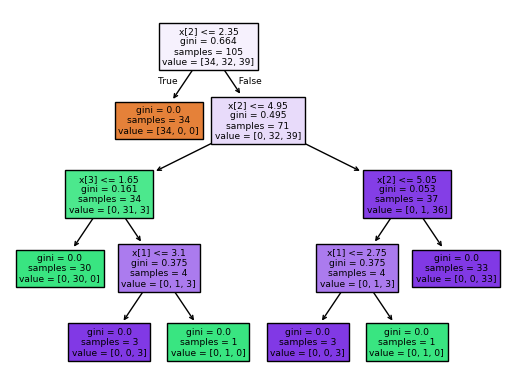

In [12]:
import matplotlib as plot
tree.plot_tree(clf, filled=True)

Une fois l’apprentissage terminé, nous pouvons visualiser l’arbre, soit avec matplotlib en passant par la méthode plot_tree, soit avec l’outil graphviz (commande dot). Par exemple, avec matplotlib :

Alternativement, il est possible de faire un export en produisant un fichier .dot qui est le format par défaut de graphviz :

In [14]:
# On exporte le graphe dans le fichier iris.dot
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, filled=True)

In [16]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [18]:
clf.score(X_test,y_test)

0.9777777777777777

Changez les valeurs de parametres max_depth et min_samples_leaf. Que constatez-vous ?

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = tree.DecisionTreeClassifier(min_samples_leaf = 20)



Question :

Le problème ici étant particulièrement simple, refaites une division apprentissage/test avec 5% des données en apprentissage et 95% test.

Calculez le taux d’éléments mal classifiés sur l’ensemble de test.

Faites varier (ou mieux, réalisez une recherche par grille avec GridSearchCV) les valeurs des paramètres max_depth et min_samples_leaf pour mesurer leur impact sur ce score.

In [23]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target,
            test_size=0.95, random_state=0)

for mdepth in [1, 2, 3, 4, 5, 6, 7]:
    clf = tree.DecisionTreeClassifier(max_depth=mdepth)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

for msplit in [2, 3, 5, 10, 15, 20]:
    clf = tree.DecisionTreeClassifier(min_samples_split=msplit)
    clf = clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

0.6573426573426573
0.951048951048951
0.8881118881118881
0.8881118881118881
0.8881118881118881
0.951048951048951
0.951048951048951
0.6013986013986014
0.951048951048951
0.6573426573426573
0.32167832167832167
0.32167832167832167
0.32167832167832167


In [25]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target,
    test_size=0.30, random_state=0)
from sklearn.model_selection import GridSearchCV
pgrid = {"max_depth": [1, 2, 3, 4, 5, 6, 7],
      "min_samples_split": [2, 3, 5, 10, 15, 20]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=pgrid, cv=10)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_.score(X_test, y_test)

0.9777777777777777

Affichage de la surface de décision
Pour une paire d’attributs, c’est-à-dire pour des observations en deux dimensions, nous pouvons visualiser la surface de décision en 2 dimensions. D’abord on discrétise le domaine bidimensionnel avec un pas constant et ensuite on évalue le modèle sur chaque point de la grille.

Dans cet exemple, nous ne gardons que la longueur et la largeur des pétales.

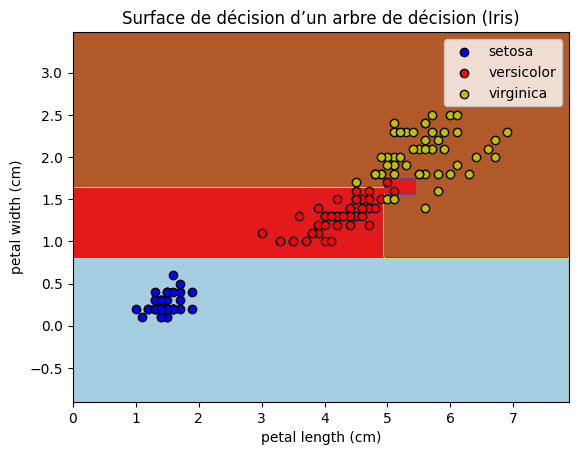

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import load_iris

# Chargement des données
iris = load_iris()

# paramètres
n_classes = 3
plot_colors = "bry"  # bleu-red-yellow
plot_step = 0.02

# choisir les attributs : longueur et largeur des pétales
pair = [2, 3]

# on ne garde que les deux attributs
X = iris.data[:, pair]
y = iris.target

# apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)

# affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step),
    np.arange(y_min, y_max, plot_step)
)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        label=iris.target_names[i],
        edgecolor="black"
    )

plt.title("Surface de décision d’un arbre de décision (Iris)")
plt.legend()
plt.show()


fin
